# Tugas 1

In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load data from a CSV file
data = pd.read_csv('data\poice.csv')

# Tampilkan 5 data pertama
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Encoding

In [4]:
# Menggunakan LabelEncoder untuk encoding kolom label
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

data['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

## Korelisasi

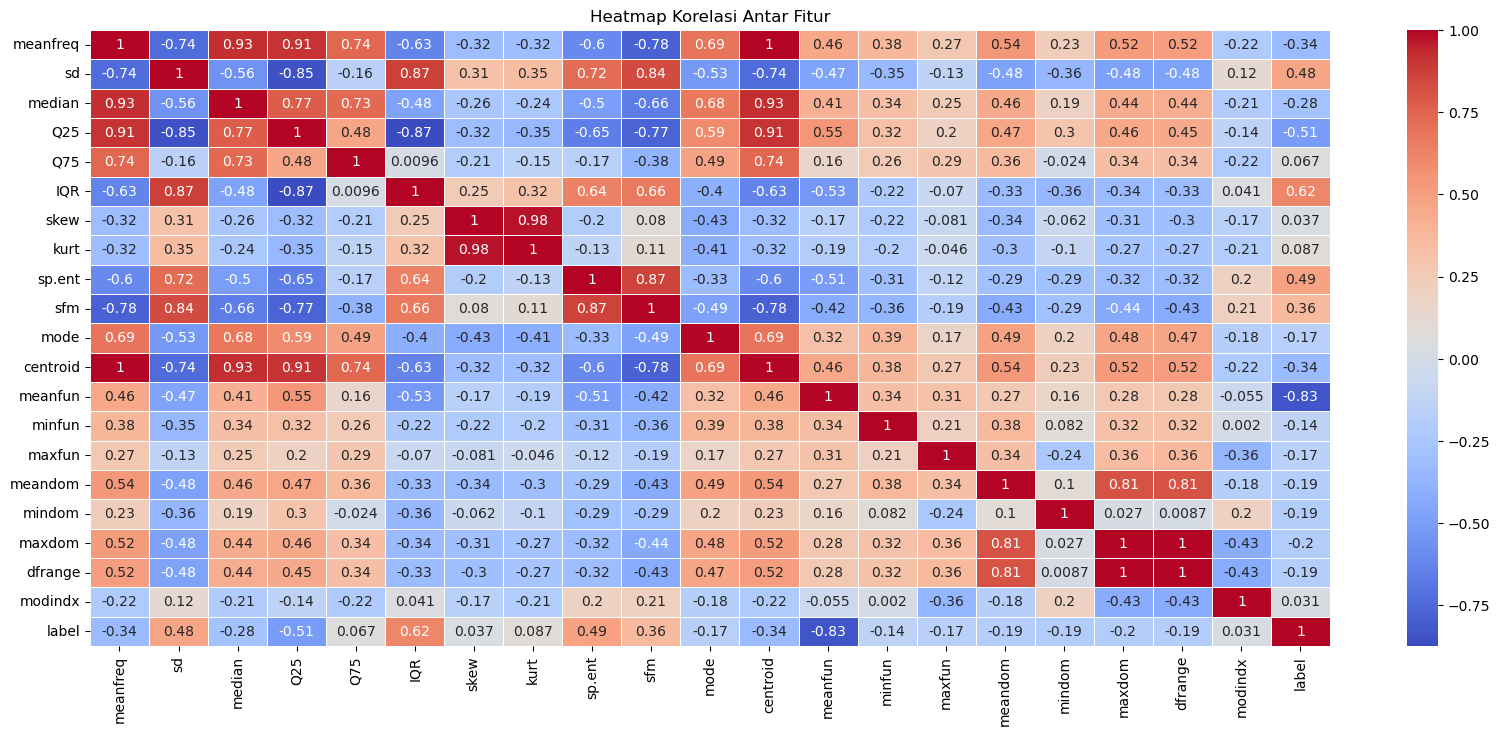

In [5]:
corr = data.corr()
plt.figure(figsize=(20, 8))  # Atur ukuran gambar sesuai kebutuhan
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

## Persiapaan Data

In [6]:
X = data[data.columns.difference(['label'])]
y = data['label']

## Preprossesing Data

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.21477826, -2.57610164, -5.69360723, ...,  0.4715753 ,
         2.29330585, -0.03908279],
       [-0.25848536, -2.48688452, -5.58898726, ...,  0.59443122,
         4.54805598, -0.06523603],
       [ 0.90932569, -2.7069865 , -3.92869875, ...,  0.39826097,
         6.51365636, -1.08373029],
       ...,
       [ 2.49266553, -2.1990394 , -0.01712269, ...,  1.38585653,
        -0.29804429,  1.15019826],
       [ 2.15365344, -1.99185206, -0.20402146, ...,  1.50571108,
        -0.36536651,  1.22984967],
       [ 2.25467137, -1.44608897,  1.10267866, ...,  1.08912637,
        -0.33848726,  0.97175912]])

In [8]:
# Hitung jumlah setiap kategori dalam kolom 'label'
label_counts = data['label'].value_counts()

# Ubah hasil perhitungan menjadi data frame
label_counts_df = pd.DataFrame({'Gender': label_counts.index, 'No. of persons': label_counts.values})

# Tampilkan data frame
print(label_counts_df)

   Gender  No. of persons
0       1            1584
1       0            1584


## Split Data

Test 25% dan Train 75%

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Modeling SVM

In [16]:
# Buat model SVM dengan kernel RBF (Radial Basis Function)
model = SVC(kernel='rbf', C=100)

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

SVC(C=100)

## Test Akurasi

In [17]:
# Prediksi label kelas menggunakan data pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {int(accuracy * 100)}%')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Menampilkan matriks konfusi
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi: 98%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       367
           1       0.98      0.98      0.98       425

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792

Confusion Matrix:
[[360   7]
 [  7 418]]
